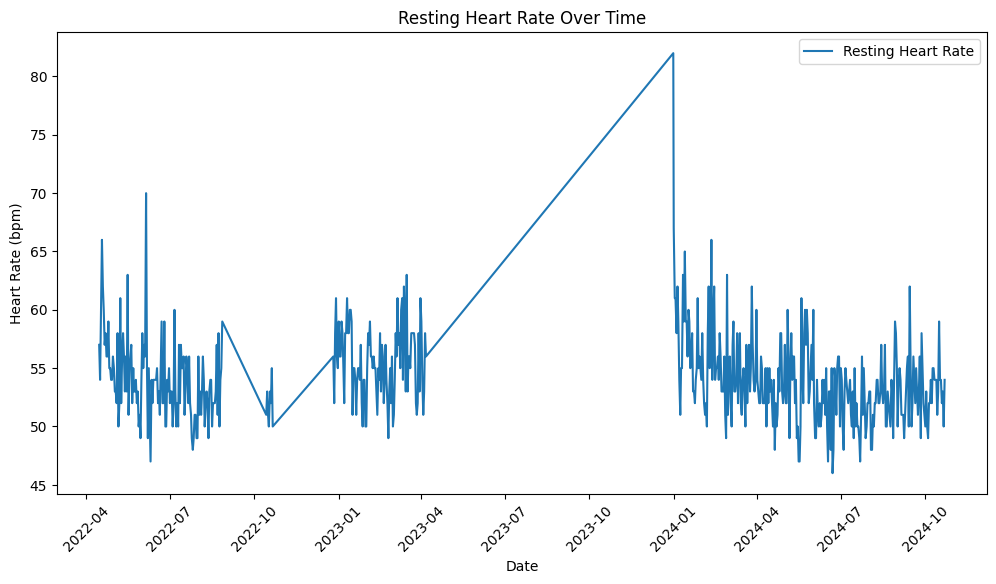

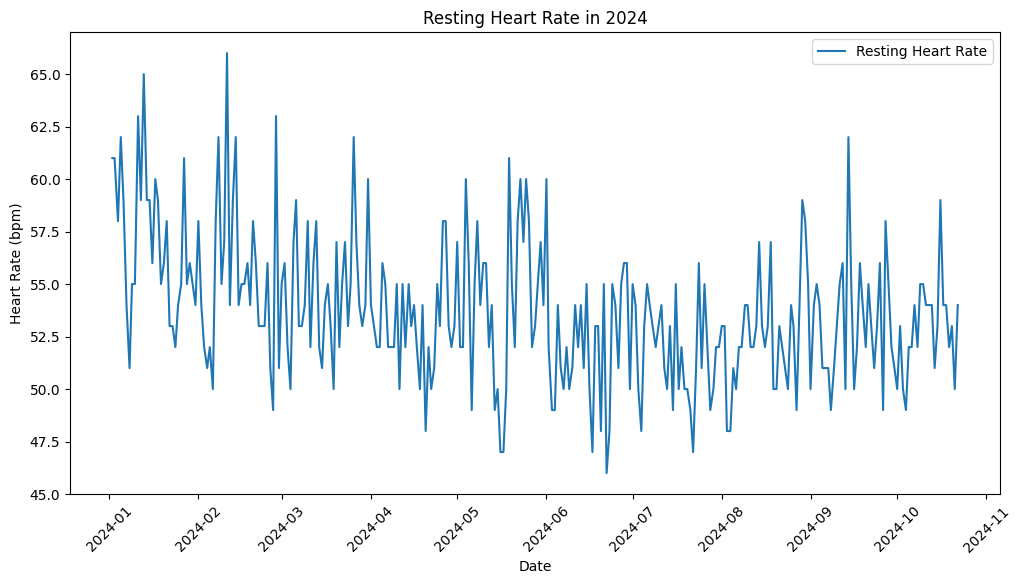

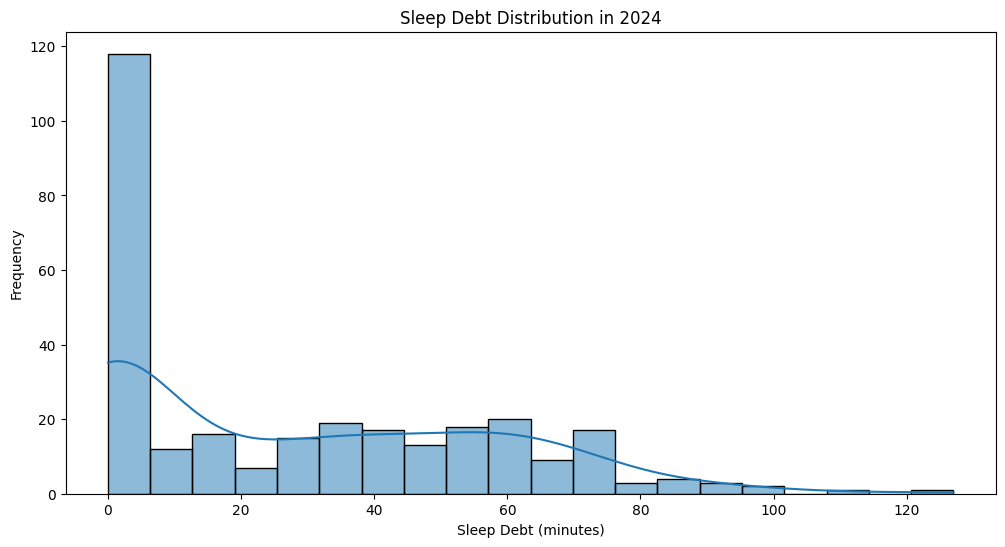

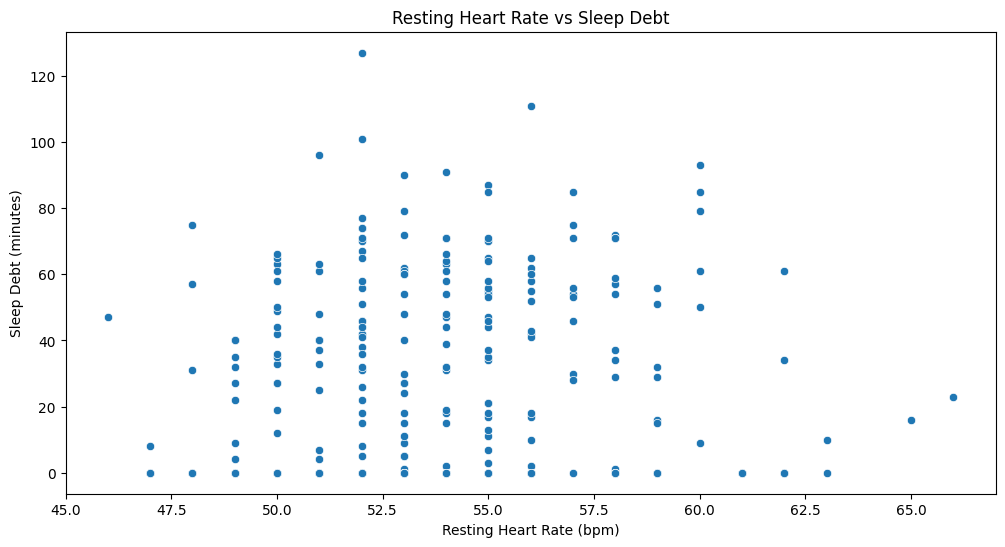

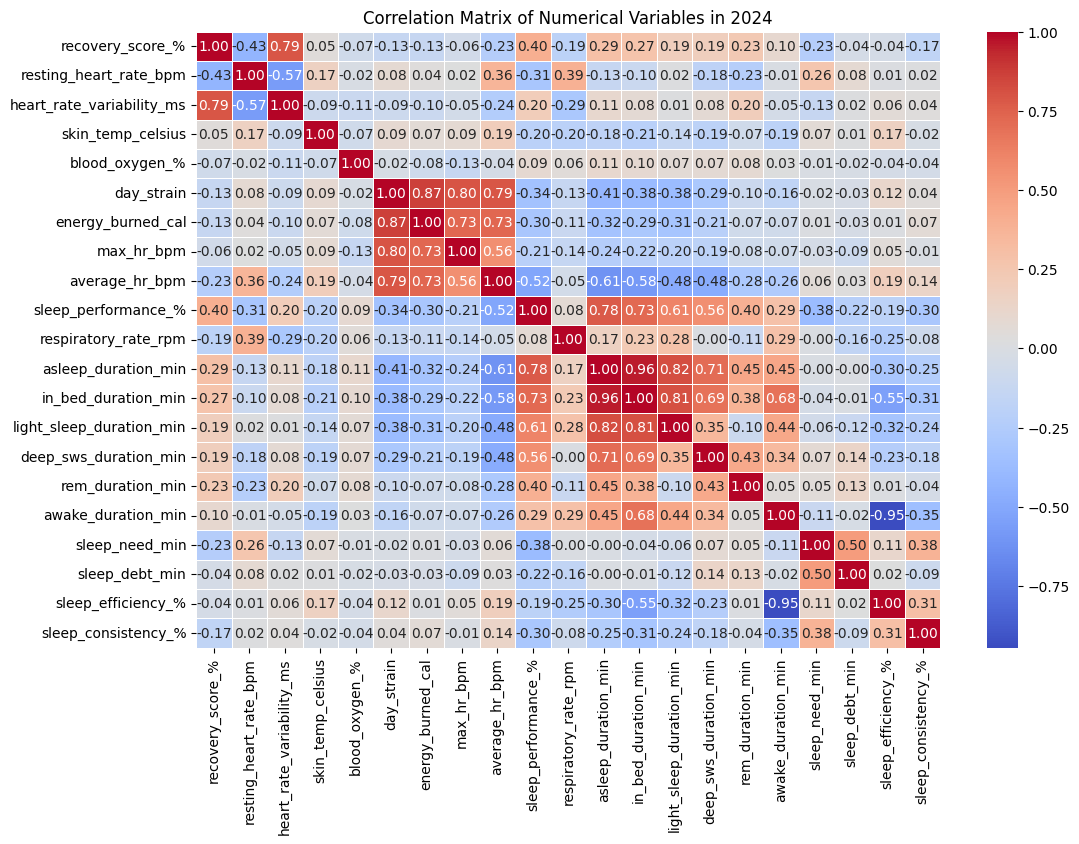

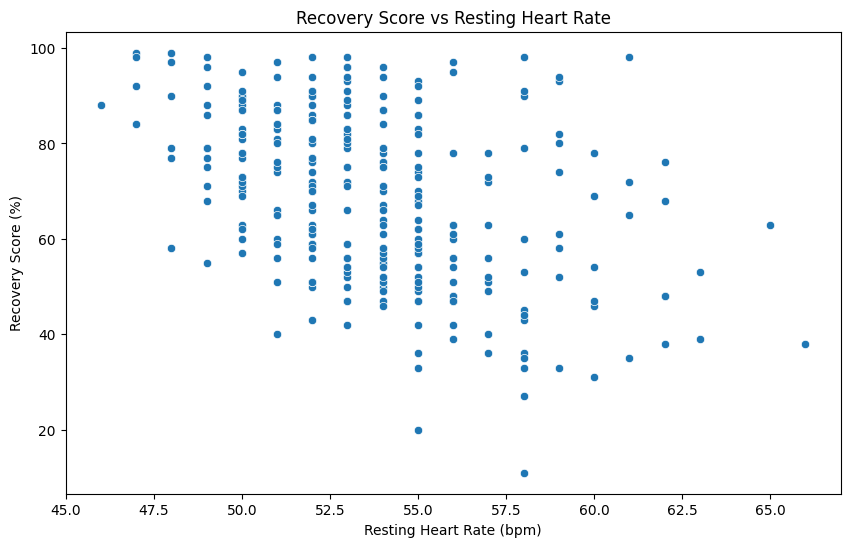

C:\Users\Charles\AppData\Local\Temp\ipykernel_19036\4113013140.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)


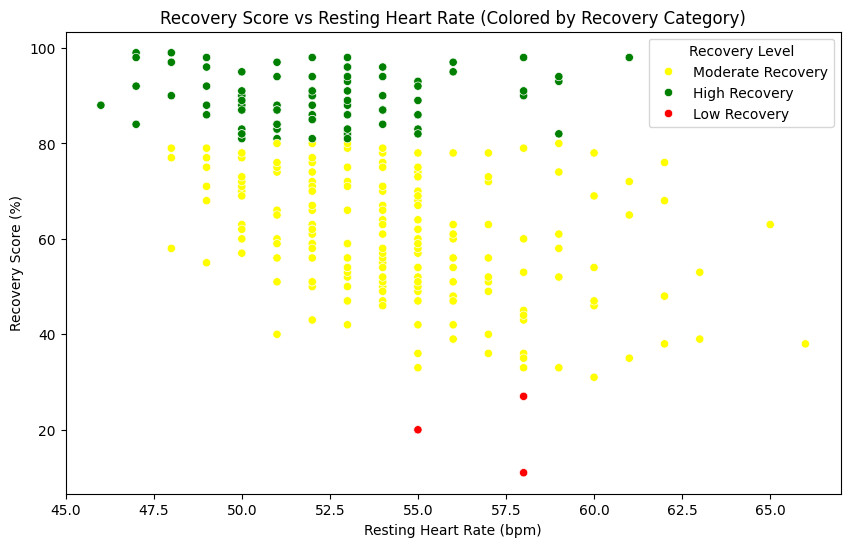

Mean Squared Error (MSE): 117.19
R-squared: 0.64


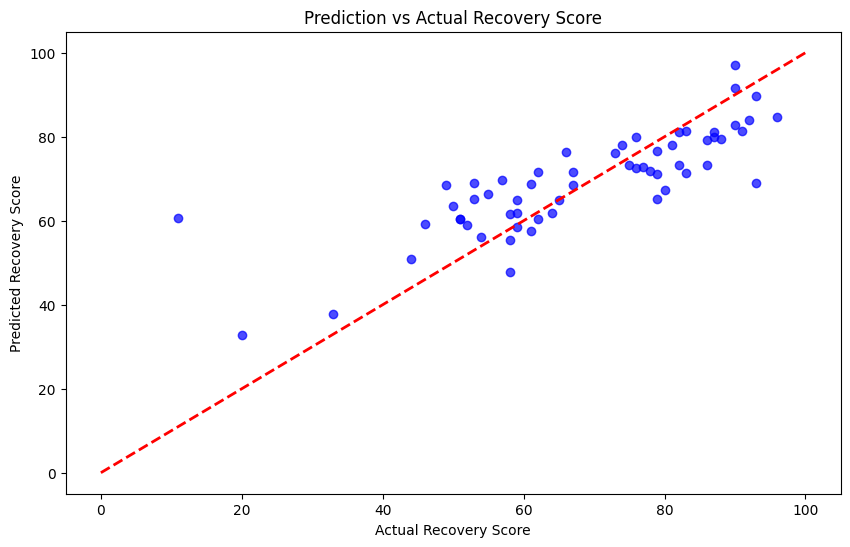

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load datasets
df_journal = pd.read_csv('data/journal_entries.csv')
df_cycles = pd.read_csv('data/physiological_cycles.csv')
df_sleeps = pd.read_csv('data/sleeps.csv')
df_workout = pd.read_csv('data/workouts.csv')

# Data preprocessing
df_cycles['cycle_start_time'] = pd.to_datetime(df_cycles['cycle_start_time'])
df_cycles['cycle_end_time'] = pd.to_datetime(df_cycles['cycle_end_time'])

# Check and handle missing values
df_cycles.isnull().sum()
df_cycles.dropna(inplace=True)

# Renaming columns for consistency
df_cycles.columns = df_cycles.columns.str.replace(r"[()]", "", regex=True).str.lower().str.replace(" ", "_")

# Save changes to a new CSV file
df_cycles.to_csv('data/physiological_cycles_v2.csv', index=False)

# Explore time-related features
df_cycles['day_of_week'] = df_cycles['cycle_start_time'].dt.dayofweek
df_cycles['month'] = df_cycles['cycle_start_time'].dt.month

# Visualize resting heart rate over time
plt.figure(figsize=(12, 6))
plt.plot(df_cycles['cycle_start_time'], df_cycles['resting_heart_rate_bpm'], label='Resting Heart Rate')
plt.title('Resting Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Filter data for the year 2024
df_cycles_2024 = df_cycles[df_cycles['cycle_start_time'].dt.year == 2024]

# Visualize resting heart rate for 2024
plt.figure(figsize=(12, 6))
plt.plot(df_cycles_2024['cycle_start_time'], df_cycles_2024['resting_heart_rate_bpm'], label='Resting Heart Rate')
plt.title('Resting Heart Rate in 2024')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Visualize sleep debt distribution for 2024
plt.figure(figsize=(12, 6))
sns.histplot(df_cycles_2024['sleep_debt_min'], kde=True, bins=20)
plt.title('Sleep Debt Distribution in 2024')
plt.xlabel('Sleep Debt (minutes)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Resting Heart Rate vs. Sleep Debt
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cycles_2024['resting_heart_rate_bpm'], y=df_cycles_2024['sleep_debt_min'])
plt.title('Resting Heart Rate vs Sleep Debt')
plt.xlabel('Resting Heart Rate (bpm)')
plt.ylabel('Sleep Debt (minutes)')
plt.show()

# Correlation matrix of numerical variables
numerical_cols = df_cycles_2024.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables in 2024')
plt.show()

# Recovery Score vs Resting Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cycles_2024['resting_heart_rate_bpm'], y=df_cycles_2024['recovery_score_%'])
plt.title('Recovery Score vs Resting Heart Rate')
plt.xlabel('Resting Heart Rate (bpm)')
plt.ylabel('Recovery Score (%)')
plt.show()

# Categorize Recovery Score
def categorize_recovery(score):
    if score > 80:
        return 'High Recovery'
    elif score < 30:
        return 'Low Recovery'
    else:
        return 'Moderate Recovery'

df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)

# Scatter plot with color coding for Recovery Categories
color_palette = {'High Recovery': 'green', 'Moderate Recovery': 'yellow', 'Low Recovery': 'red'}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cycles_2024['resting_heart_rate_bpm'],
    y=df_cycles_2024['recovery_score_%'],
    hue=df_cycles_2024['Recovery_Category'],
    palette=color_palette
)
plt.title('Recovery Score vs Resting Heart Rate (Colored by Recovery Category)')
plt.xlabel('Resting Heart Rate (bpm)')
plt.ylabel('Recovery Score (%)')
plt.legend(title='Recovery Level')
plt.show()

# Predicting Recovery Score using Linear Regression
X = df_cycles_2024[['resting_heart_rate_bpm', 'heart_rate_variability_ms']]
y = df_cycles_2024['recovery_score_%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--', linewidth=2)  # Perfect prediction line
plt.title('Prediction vs Actual Recovery Score')
plt.xlabel('Actual Recovery Score')
plt.ylabel('Predicted Recovery Score')
plt.show()
